# Smart Crop earn prediction model 

# problem statement: How can crop yield prediction algorithms be improved to generalize across diverse geographical regions and varying environmental conditions

# Steps done in the project:

1.Data Loading and Exploration: Load the CSV files into Pandas DataFrames and explore the data.

2.Data Preprocessing: Merge the data, handle missing values, and encode categorical features.

3.Feature Selection and Data Splitting: Select features, split data into training and testing sets.

4.Model Training: Train XGBoost and LightGBM models and compare their accuracies.

5.Visualization: Plot the four-month analysis for the predicted crop.

6.Flask App: Set up a Flask app with routes for prediction and analysis.

7.HTML Template: Create an HTML template to display the prediction results and analysis charts using Chart.js.


In [1]:
pip install --upgrade pandas

In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade dask lightgbm pandas

In [5]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install flask flask-ngrok


In [1]:
import dask
import lightgbm
import pandas as pd

print(f'Dask version: {dask.__version__}')
print(f'LightGBM version: {lightgbm.__version__}')
print(f'Pandas version: {pd.__version__}')


C:\Users\91992\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\91992\anaconda3\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Dask version: 2024.10.0
LightGBM version: 4.5.0
Pandas version: 2.2.3


# Step 1: Data Loading

In [2]:
data=pd.read_csv('yield_df.csv')

In [3]:
crop_data=data.copy()

In [4]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   crop                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  int64  
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [5]:
crop_data.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [6]:
crop_data=crop_data.drop('Unnamed: 0',axis=1)

In [7]:
crop_data.head()

,Area,crop,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
crop_data.columns

Index(['Area', 'crop', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

#  Performing EDA

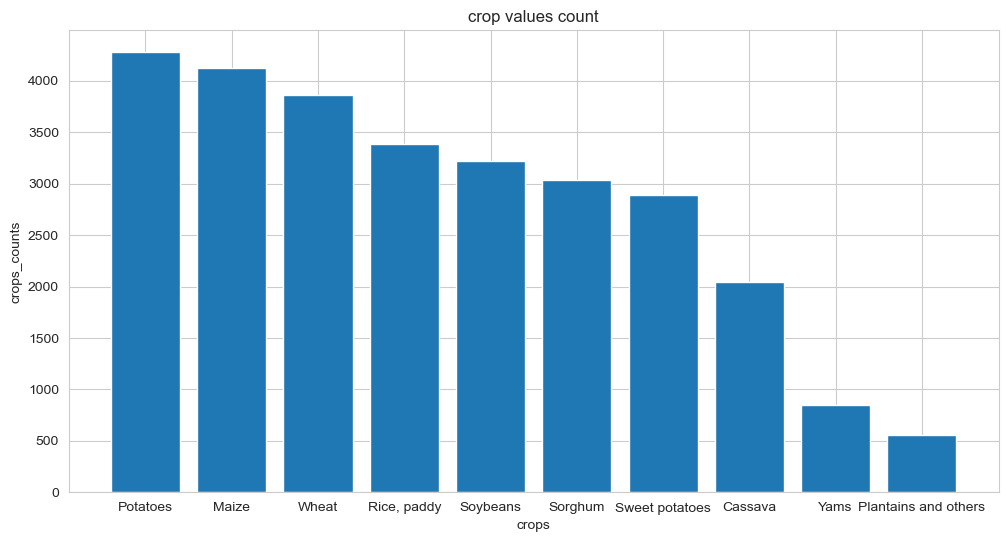

In [10]:
# crop value count
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
area_counts=crop_data['crop'].value_counts()
plt.bar(x=area_counts.index,
       height=area_counts.values)
plt.title('crop values count')
plt.xlabel('crops')
plt.ylabel('crops_counts')
plt.show()

# This bar graph tell us that our highest earning crop is potatos according  to the data

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


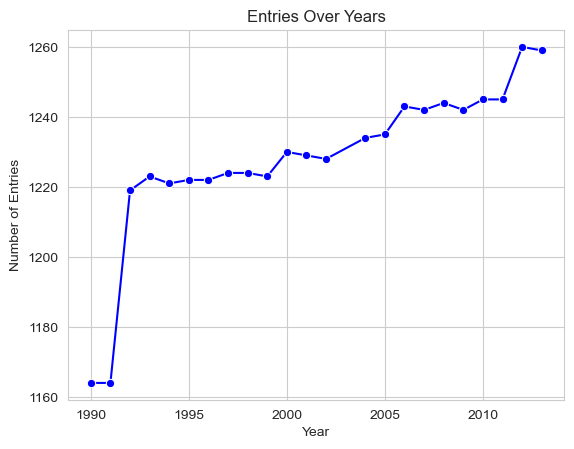

In [11]:
plt.figure()
year_counts = data['Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='b')
plt.title('Entries Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.show()

#  the highest  crop earning increases  after year 1991

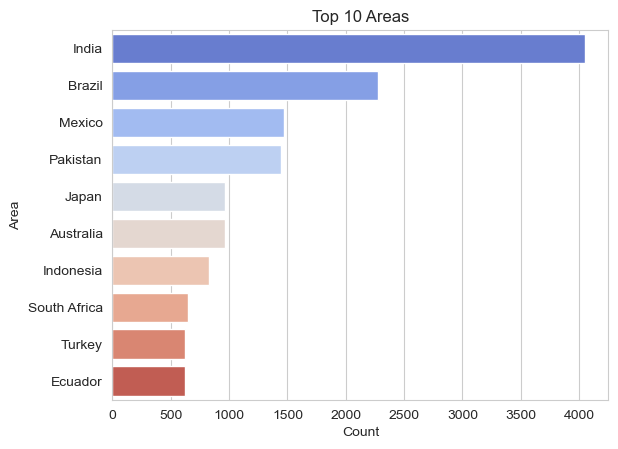

In [12]:
plt.figure()
area_counts = data['Area'].value_counts().head(10)
sns.barplot(x=area_counts.values, y=area_counts.index, palette='coolwarm')
plt.title('Top 10 Areas')
plt.xlabel('Count')
plt.ylabel('Area')
plt.show()

#  India is the highest  crop producer according to the data

C:\Users\91992\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


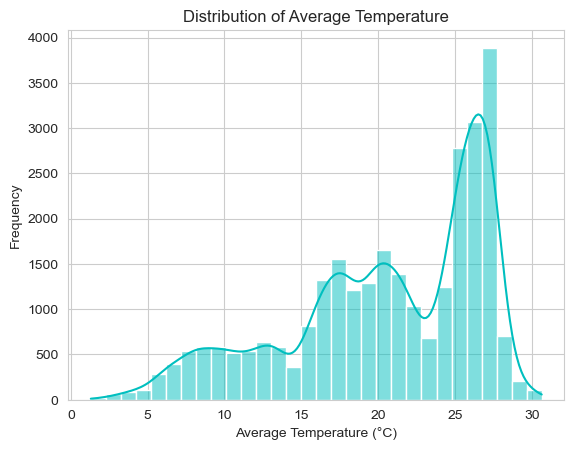

In [13]:
plt.figure()
sns.histplot(data['avg_temp'], bins=30, kde=True, color='c')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

#  highest frequency of the  average temperature  is about 3700 of  27 degree celcius

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [15]:
crop_data=crop_data.rename(columns={
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [16]:
crop_data

,Area,crop,Year,hg/ha_yield,Rainfall,Pesticides,Avg_Temp
0,Albania,Maize,1990,36613,1485,121.00,16.37
1,Albania,Potatoes,1990,66667,1485,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.00,16.37
3,Albania,Sorghum,1990,12500,1485,121.00,16.37
4,Albania,Soybeans,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76


In [17]:
# Encode categorical variable
label_encoder=LabelEncoder()
crop_data['Area'] = label_encoder.fit_transform(data['Area'])
crop_data['crop'] = label_encoder.fit_transform(data['crop'])

In [18]:
crop_data

,Area,crop,Year,hg/ha_yield,Rainfall,Pesticides,Avg_Temp
0,0,1,1990,36613,1485,121.00,16.37
1,0,3,1990,66667,1485,121.00,16.37
2,0,4,1990,23333,1485,121.00,16.37
3,0,5,1990,12500,1485,121.00,16.37
4,0,6,1990,7000,1485,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657,2550.07,19.76
28238,100,5,2013,3066,657,2550.07,19.76
28239,100,6,2013,13142,657,2550.07,19.76
28240,100,7,2013,22222,657,2550.07,19.76


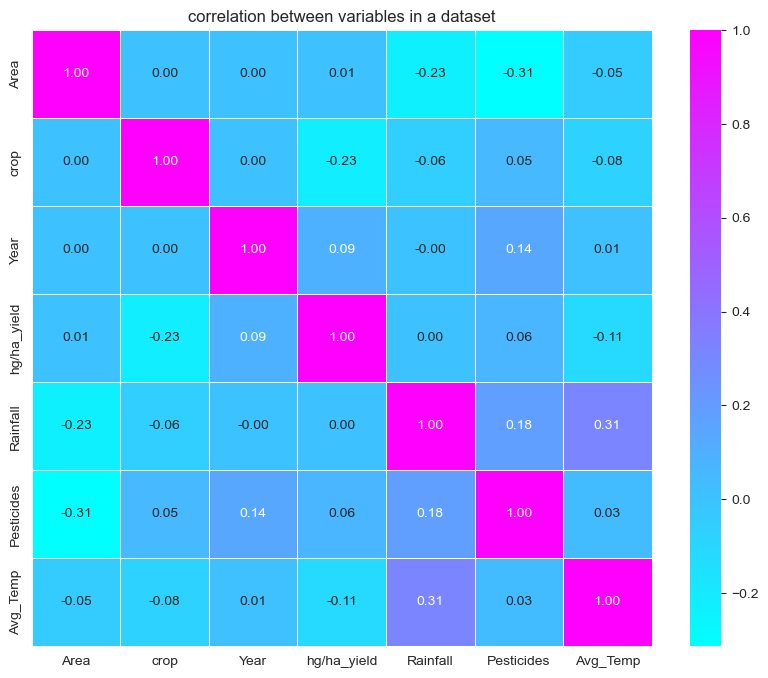

In [19]:
cor_matrix=crop_data.corr(numeric_only=True)

# creating  a heatmap to visulaize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix,annot=True,
           cmap='cool',
           fmt='.2f',
           linewidth=0.5)
plt.title('correlation between variables in a dataset')
plt.show()

In [20]:
# define feature and target variable
X = crop_data.drop(columns=['crop'])
y = crop_data['crop']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22593, 6) (5649, 6) (22593,) (5649,)


# Random Forest model building

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf=rf_model.predict(X_test)

In [25]:
y_pred_rf

array([4, 4, 5, ..., 0, 1, 5])

In [26]:
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
accuracy_rf=rf_model.score(X_test,y_test)

In [27]:
print("Randomforest model algorithm results")
print(f"RMSE RF: {rmse_rf}")
print(f"Acc RF: {round(accuracy_rf*100,2)}%")

Randomforest model algorithm results
RMSE RF: 1.737713870430321
Acc RF: 82.81%


#  Randomforest model algorithm results
# RMSE RF: 1.737713870430321
# Acc RF: 82.81%

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.metrics import mean_squared_error

#  Decision tree model building

In [30]:
# Step 3: Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
#Evaluate the Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_pred_dt=dt_model.predict(X_test)


In [32]:
rmse_dt=np.sqrt(mean_squared_error(y_test,y_pred_dt))
accuracy_dt=dt_model.score(X_test,y_test)

In [33]:
print("Decision tree algorithm results")
print(f"RMSE RF: {rmse_dt}")
print(f"Acc RF: {round(accuracy*100,2)}%")

Decision tree algorithm results
RMSE RF: 1.6476701070697617
Acc RF: 85.24%


#  Decision  Tree model results
# RMSE RF: 1.6476701070697617
# Acc DT: 85.24%

In [34]:
# import necessary libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  accuracy_score

# Build an XGBoost model for optimizing the accuracy of an algorithm

In [35]:
# Define the XGBoost model
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [36]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [ ]:
# Perform Grid Search for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters for XGBoost
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)

In [ ]:
# Predict and evaluate XGBoost model
xgb_best = xgb_grid_search.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
XGBoost_Accuracy=accuracy_score(y_test, y_pred_xgb)*100
print("XGBoost accuracy:",XGBoost_Accuracy)

# Build an Lightgbm model for optimizing the accuracy

In [ ]:
#LightGBM Hyperparameter Grid

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}


In [ ]:
lgb_model = LGBMClassifier()

lgb_random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=lgb_param_grid,
                                       n_iter=10, scoring='accuracy', cv=5, verbose=1, random_state=42)

lgb_random_search.fit(X_train, y_train)

print("Best parameters for LightGBM: ", lgb_random_search.best_params_)

lgb_best_model = lgb_random_search.best_estimator_


In [ ]:
#Evaluate LightGBM Model
lgb_predictions = lgb_best_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
print("LightGBM Accuracy: ", lgb_accuracy*100)
lgb_predictions


#  conclusion : BY experimenting both the accuracy optimization algorithm xgboost and lightgbm  we have observed that our lightgbm algorithm gives highest accuracy ac compared to xgboost

1 Acc RF: 82.81%,
2 Acc DT: 85.24%,
3 XGBoost Accuracy:  84.47%,
4 LightGBM Accuracy:  85.95%,

#  there is a difference of 70 points  between normal algorithm and accuracy optimaization algorithm 
# Decision Tree : 85.24
# Lightgbm : 85.95%

#  so now for our project  further deployment we can use our lightgbm algorithm with 85.95% accuracy

In [ ]:
better_model = 'XGBoost' if XGBoost_Accuracy < lgb_accuracy else 'LightGBM'
print(f'The better model is: {better_model}')

In [ ]:
if lgb_accuracy > XGBoost_Accuracy:
    best_model = lgb_model
    best_model_name = 'LightGBM'
    print(best_model_name)
else:
    best_model = xgb
    best_model_name = 'XGBoost'

# Save the best model
#with open('best_model.pkl', 'wb') as f:
#    pickle.dump(best_model, f)

#  Now our next step is build frontend and backend for our model

In [ ]:
data['Area'].unique().size

In [ ]:
data['crop'].unique()

In [ ]:
import numpy as np

In [ ]:
lgb_best_model.fit(X_train, y_train)

In [ ]:
encoded_area=crop_data['Area'].unique()
encoded_area

In [ ]:
decode_area=['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal',
       'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Tajikistan', 'Thailand',
       'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Kingdom',
       'Uruguay', 'Zambia', 'Zimbabwe']

In [ ]:
# Create a dictionary mapping encode_area to decode_area
area_mapping = dict(zip(encoded_area, decode_area))

# Print the resulting dictionary
print(area_mapping)


In [ ]:
X_test.Area.unique()

In [ ]:
# X_test unique values
X_test_unique_values = [85, 56, 22, 42, 14, 73, 64, 74, 26, 17, 100, 70, 80,
                        2, 62, 3, 94, 54, 57, 45, 39, 60, 31, 5, 19, 77,
                        40, 50, 96, 75, 41, 49, 99, 48, 83, 67, 18, 84, 86,
                        97, 95, 43, 37, 55, 82, 27, 59, 81, 69, 46, 66, 91,
                        52, 51, 36, 68, 25, 88, 71, 0, 28, 33, 10, 98, 16,
                        76, 20, 15, 21, 23, 44, 11, 92, 65, 47, 32, 34, 35,
                        13, 8, 79, 90, 6, 93, 1, 9, 53, 58, 38, 30, 29, 24,
                        7, 4, 78, 89, 12, 72, 61, 63, 87]

# Mapping dictionary
area_mapping = {0: 'Albania', 1: 'Algeria', 2: 'Angola', 3: 'Argentina', 4: 'Armenia', 5: 'Australia', 6: 'Austria', 
                7: 'Azerbaijan', 8: 'Bahamas', 9: 'Bahrain', 10: 'Bangladesh', 11: 'Belarus', 12: 'Belgium', 
                13: 'Botswana', 14: 'Brazil', 15: 'Bulgaria', 16: 'Burkina Faso', 17: 'Burundi', 18: 'Cameroon', 
                19: 'Canada', 20: 'Central African Republic', 21: 'Chile', 22: 'Colombia', 23: 'Croatia', 
                24: 'Denmark', 25: 'Dominican Republic', 26: 'Ecuador', 27: 'Egypt', 28: 'El Salvador', 29: 'Eritrea', 
                30: 'Estonia', 31: 'Finland', 32: 'France', 33: 'Germany', 34: 'Ghana', 35: 'Greece', 36: 'Guatemala', 
                37: 'Guinea', 38: 'Guyana', 39: 'Haiti', 40: 'Honduras', 41: 'Hungary', 42: 'India', 43: 'Indonesia', 
                44: 'Iraq', 45: 'Ireland', 46: 'Italy', 47: 'Jamaica', 48: 'Japan', 49: 'Kazakhstan', 50: 'Kenya', 
                51: 'Latvia', 52: 'Lebanon', 53: 'Lesotho', 54: 'Libya', 55: 'Lithuania', 56: 'Madagascar', 
                57: 'Malawi', 58: 'Malaysia', 59: 'Mali', 60: 'Mauritania', 61: 'Mauritius', 62: 'Mexico', 
                63: 'Montenegro', 64: 'Morocco', 65: 'Mozambique', 66: 'Namibia', 67: 'Nepal', 68: 'Netherlands', 
                69: 'New Zealand', 70: 'Nicaragua', 71: 'Niger', 72: 'Norway', 73: 'Pakistan', 74: 'Papua New Guinea', 
                75: 'Peru', 76: 'Poland', 77: 'Portugal', 78: 'Qatar', 79: 'Romania', 80: 'Rwanda', 81: 'Saudi Arabia', 
                82: 'Senegal', 83: 'Slovenia', 84: 'South Africa', 85: 'Spain', 86: 'Sri Lanka', 87: 'Sudan', 
                88: 'Suriname', 89: 'Sweden', 90: 'Switzerland', 91: 'Tajikistan', 92: 'Thailand', 93: 'Tunisia', 
                94: 'Turkey', 95: 'Uganda', 96: 'Ukraine', 97: 'United Kingdom', 98: 'Uruguay', 99: 'Zambia', 
                100: 'Zimbabwe'}

# Decoding the X_test values
decoded_X_test = [area_mapping[value] for value in X_test_unique_values]

# Print the decoded values
print(decoded_X_test)


In [ ]:

import numpy as np

# Assuming 'lgb_best_model' is your trained LightGBM model, and area_mapping is your dictionary
# Define the input features in the correct order as expected by your model
def predict_crop(area, year, hg_ha_yield, avg_temp, avg_rainfall_mm, pesticides_tonnes):
    # Encode the 'area' input (we assume the input area is given as a string, e.g., "India")
    area_encoded = list(area_mapping.keys())[list(area_mapping.values()).index(area)]
    
    # Create the input array based on the input values
    input_features = np.array([[area_encoded, year, hg_ha_yield, avg_temp, avg_rainfall_mm, pesticides_tonnes]])
    
    # Make the prediction
    prediction = lgb_best_model.predict(input_features)
    if prediction == 1:
        print("Maize is the best crop to be cultivated right there")
    elif prediction == 2:
        print("potatoes is the best crop to be cultivated right there")
    elif prediction == 3:
        print("Rice, paddy is the best crop to be cultivated right there")
    elif prediction == 4:
        print("Sorghum is the best crop to be cultivated right there")
    elif prediction == 5:
        print("Soybeans is the best crop to be cultivated right there")
    elif prediction == 6:
        print("Wheat is the best crop to be cultivated right there")
    elif prediction == 7:
        print("Cassava is the best crop to be cultivated right there")
    elif prediction == 8:
        print("Sweet potatoes is the best crop to be cultivated right there")
    elif prediction == 9:
        print("Plantains and others is the best crop to be cultivated right there")
    elif prediction == 10:
        print("Yams is the best crop to be cultivated right there")
    
    #return prediction

# Example of making a prediction
predicted_crop = predict_crop("India",2025,7602,27,42482,1083)
print(predicted_crop)



In [ ]:
from flask import Flask, render_template_string, request
import numpy as np

# Dummy area_mapping for example purposes (replace with your actual area_mapping)
area_mapping = {0: 'Albania', 1: 'Algeria', 2: 'Angola', 3: 'Argentina', 4: 'Armenia', 5: 'Australia', 
                6: 'Austria', 7: 'Azerbaijan', 8: 'Bahamas', 9: 'Bahrain', 10: 'Bangladesh', 
                # (truncated for brevity, add all areas)
                98: 'Uruguay', 99: 'Zambia', 100: 'Zimbabwe'}

# Mockup of your trained LightGBM model (replace with your actual model)
class MockModel:
    def predict(self, features):
        # Mock prediction logic for testing
        avg_temp = features[0][3]
        if avg_temp < 15:
            return [3]  # Rice
        elif 15 <= avg_temp < 25:
            return [1]  # Maize
        elif 25 <= avg_temp < 35:
            return [5]  # Soybeans
        else:
            return [7]  # Cassava

lgb_best_model = MockModel()

# Prediction function
def predict_crop(area, year, hg_ha_yield, avg_temp, avg_rainfall_mm, pesticides_tonnes):
    # Encode the 'area' input
    area_encoded = area_mapping.get(area, 0)  # Default to 0 if area is not found
    
    # Create the input array based on the input values
    input_features = np.array([[area_encoded, year, hg_ha_yield, avg_temp, avg_rainfall_mm, pesticides_tonnes]])
    
    # Make the prediction
    prediction = lgb_best_model.predict(input_features)[0]

    # Map prediction to crop names
    crop_dict = {
        1: "Maize",
        2: "Potatoes",
        3: "Rice, paddy",
        4: "Sorghum",
        5: "Soybeans",
        6: "Wheat",
        7: "Cassava",
        8: "Sweet potatoes",
        9: "Plantains and others",
        10: "Yams"
    }

    return f"{crop_dict.get(prediction, 'Unknown crop prediction')} is the best crop to be cultivated right there"

# Initialize the Flask app
app = Flask(__name__)

# HTML template for the input form page
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-image: url('/static/3.jpg');
            background-size: cover;
            background-position: center;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
        }
        .container {
            background-color: rgba(255, 255, 255, 0.9);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            max-width: 400px;
            width: 100%;
        }
        h2 {
            text-align: center;
            color: #333;
        }
        input[type="text"], input[type="number"] {
            width: 100%;
            padding: 10px;
            margin: 10px 0;
            border-radius: 5px;
            border: 1px solid #ccc;
        }
        button {
            width: 100%;
            padding: 10px;
            background-color: #28a745;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 16px;
            cursor: pointer;
        }
        button:hover {
            background-color: #218838;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Crop Prediction</h2>
        <form method="POST" action="/result">
            <label for="area">Area:</label>
            <input type="text" id="area" name="area" placeholder="Enter area (e.g., Albania)" required>
            
            <label for="year">Year:</label>
            <input type="number" id="year" name="year" placeholder="Enter year (e.g., 2021)" required>
            
            <label for="hg_ha_yield">hg/ha Yield:</label>
            <input type="number" id="hg_ha_yield" name="hg_ha_yield" placeholder="Enter hg/ha Yield" required>
            
            <label for="avg_temp">Average Temperature (°C):</label>
            <input type="number" id="avg_temp" name="avg_temp" placeholder="Enter avg temperature" required>
            
            <label for="avg_rainfall_mm">Average Rainfall (mm):</label>
            <input type="number" id="avg_rainfall_mm" name="avg_rainfall_mm" placeholder="Enter avg rainfall in mm" required>
            
            <label for="pesticides_tonnes">Pesticides (Tonnes):</label>
            <input type="number" id="pesticides_tonnes" name="pesticides_tonnes" placeholder="Enter pesticides in tonnes" required>
            
            <button type="submit">Predict</button>
        </form>
    </div>
</body>
</html>
"""


# HTML template for the result page
result_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Crop Prediction Result</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-image: url('/static/3.jpg');
            background-size: cover;
            background-position: center;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
        }
        .container {
            background-color: rgba(255, 255, 255, 0.9);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            max-width: 400px;
            width: 100%;
            text-align: center;
        }
        h2 {
            color: #333;
        }
        .result {
            font-size: 20px;
            margin-top: 20px;
            color: #28a745;
        }
        button {
            margin-top: 20px;
            padding: 10px 20px;
            background-color: #28a745;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 16px;
            cursor: pointer;
        }
        button:hover {
            background-color: #218838;
        }
    </style>
</head>
<body>
    <div class="container">
        <h2>Crop Prediction Result</h2>
        <div class="result">{{ prediction_text }}</div>
        <a href="/"><button>Go Back</button></a>
    </div>
</body>
</html>
"""


# Route to display form
@app.route('/', methods=['GET'])
def index():
    return render_template_string(html_template)

# Route to process input and display result
@app.route('/result', methods=['POST'])
def result():
    # Get form inputs
    area = request.form['area']
    year = int(request.form['year'])
    hg_ha_yield = float(request.form['hg_ha_yield'])
    avg_temp = float(request.form['avg_temp'])
    avg_rainfall_mm = float(request.form['avg_rainfall_mm'])
    pesticides_tonnes = float(request.form['pesticides_tonnes'])
    
    # Get prediction using your provided function
    predicted_crop = predict_crop(area, year, hg_ha_yield, avg_temp, avg_rainfall_mm, pesticides_tonnes)
    
    # Display the result
    return render_template_string(result_template, prediction_text=predicted_crop)

# Run the app (make sure to stop the app by interrupting the kernel when done)
if __name__ == '__main__':
    app.run(port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Nov/2024 11:40:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 11:40:10] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 11:40:10] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Nov/2024 12:03:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 12:03:59] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 13:01:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 13:01:02] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 13:01:40] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 13:01:40] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 13:01:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 13:01:58] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 13:03:00] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2024 13:03:00] "GET /static/3.jpg HTTP/1.1" 304 -
127.0.0.1 - - [25/Nov/2024 13:03:17] "GET / HTTP/1.1" 200 -
127.0.

In [ ]:
#Area = 1 Albania,Maize,1991,29068,1485,121,15.36
#Year = 1990
#hg_ha_yield = 36613
#avg_temp = 16.37
#average_rain_fall_mm_per_year = 36613
#pesticides_tonnes = 121